In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
dataVPG = pd.read_csv('~/Documents/reinforcement_learning/VPG/progress.csv', sep = ',', engine = 'python')
dataTNPG = pd.read_csv('~/Documents/reinforcement_learning/TNPG/progress.csv', sep = ',', engine = 'python')
dataREPS = pd.read_csv('~/Documents/reinforcement_learning/REPS/progress.csv', sep = ',', engine = 'python')
dataTRPO = pd.read_csv('~/Documents/reinforcement_learning/TRPO/progress.csv', sep = ',', engine = 'python')
dataCEM = pd.read_csv('~/Documents/reinforcement_learning/CEM/progress.csv', sep = ',', engine = 'python')
dataCMAES = pd.read_csv('~/Documents/reinforcement_learning/CMAES/progress.csv', sep = ',', engine = 'python')

In [37]:
dataTRPO.head()

,dLoss,AverageReturn,NumTrajs,LossAfter,AverageDiscountedReturn,MaxReturn,MeanKLBefore,Iteration,StdReturn,MinReturn,LossBefore,Perplexity,ExplainedVariance,Entropy,MeanKL
0,0.015577,19.307692,208,-0.015577,17.305026,61.0,-3.519273e-19,0,9.225359,8.0,3.461153e-16,1.973208,1.508279e-10,0.679661,0.005442
1,0.020173,22.778409,176,-0.020173,19.842837,95.0,3.044815e-19,1,12.906208,9.0,-1.624349e-16,1.985817,-3.319496e-03,0.686030,0.007233
2,0.028879,26.576159,151,-0.028879,22.787057,74.0,-9.144035e-19,2,13.313558,10.0,5.876187e-17,1.979104,3.200355e-01,0.682644,0.008018
3,0.021704,41.268041,97,-0.021704,31.757865,121.0,1.975600e-18,3,26.457324,9.0,-3.816305e-17,1.939949,1.801161e-01,0.662662,0.007907
4,0.019633,55.438356,73,-0.019633,39.726859,162.0,1.361300e-18,4,33.824279,14.0,-1.377148e-17,1.900392,1.718417e-01,0.642060,0.006977


In [38]:
plt.figure(figsize = (15, 8))
plt.plot([0, 250], [200, 200], 'r', linewidth=2)

pl1 = plt.plot(dataVPG["Iteration"], dataVPG["AverageReturn"], linewidth=2, label='VPG')
pl1 = plt.plot(dataTNPG["Iteration"], dataTNPG["AverageReturn"], 'c', linewidth=2, label='TNPG')
pl1 = plt.plot(dataREPS["Iteration"], dataREPS["AverageReturn"], 'y', linewidth=2, label='REPS')
pl1 = plt.plot(dataTRPO["Iteration"], dataTRPO["AverageReturn"], 'g', linewidth=2, label='TRPO')
pl1 = plt.plot(dataCEM["Iteration"], dataCEM["AverageReturn"], 'darkorange', linewidth=2, label='CEM')
pl1 = plt.plot(dataCMAES["Iteration"], dataCMAES["AverageReturn"], 'maroon', linewidth=2, label='CMAES')
plt.xlabel("Iterations")
plt.ylabel("Average return")
plt.ylim(0, 220)
plt.legend()

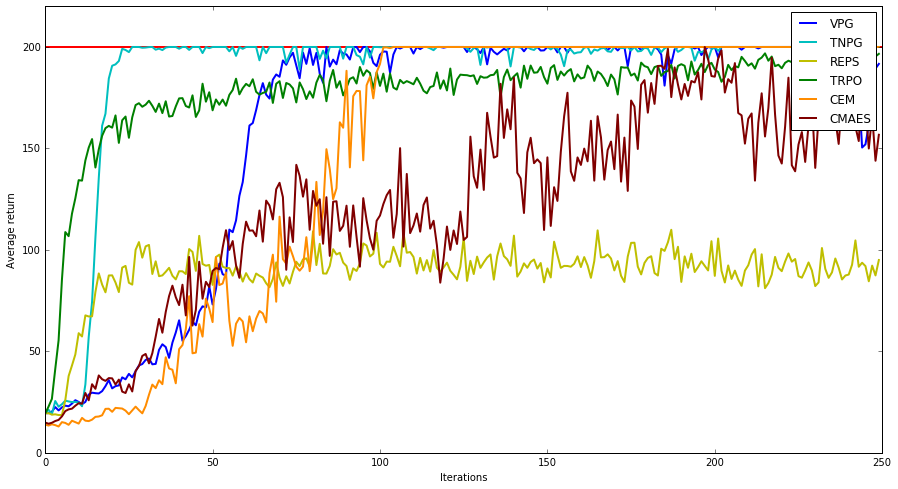

In [39]:
plt.show()

- Vanilla Policy Gradient
- Truncated Natural Policy Gradient
- Reward-Weighted Regression
- Relative Entropy Policy Search
- Trust Region Policy Optimization
- Cross Entropy Method
- Covariance Matrix Adaption Evolution Strategy

In [40]:
import json
import datetime

In [41]:
def loadJson(file):
    jsonFile = open(file)
    return json.load(jsonFile)

In [42]:
def timestamp_to_time(timestamp):
    return datetime.datetime.fromtimestamp(
        int(timestamp)
    )

In [54]:
def timeRewardPlot(jsonData, col, lab):
    episode_rewards = jsonData['episode_rewards']
    start_timestamp = timestamp_to_time(jsonData['initial_reset_timestamp'])
    timestamps = [timestamp_to_time(x) - start_timestamp for x in jsonData['timestamps']]

    plt.figure(figsize = (15, 8))
    plt.plot([ob.seconds for ob in timestamps], episode_rewards, linestyle='', marker='o', color =col, label=lab)
    plt.xlim(0, int(max(timestamps).seconds) + 20)
    plt.ylim(0, 420)
    plt.legend()
    plt.show()
    pass
    

In [44]:
def iterToRewardPlot(jsonData, col, lab):
#     average_rewards = []
#     episode_rewards = jsonData['episode_rewards']
#     for i in range(0, len(episode_rewards), 50):
#         if i + 50 > len(episode_rewards):
#             break
#         average_rewards.append(np.mean(episode_rewards[i:i+50]))
        
#     plt.figure(figsize = (15, 8))
#     plt.plot([i for i in range(0, len(average_rewards))], average_rewards, 
#              color=col, label=lab, linewidth=2)
#     plt.xlim(0, len(average_rewards) + 20)
#     plt.ylim(0, max(average_rewards) + 20)
#     plt.legend()
#     plt.show()
    pass

In [45]:
def average_reward_for_iterations(step):
    average_rewards = []
    episode_rewards = jsonData['episode_rewards']
    for i in range(0, len(episode_rewards), step):
        if i + step > len(episode_rewards):
            break
        average_rewards.append(np.mean(episode_rewards[i:i+step]))
    return average_rewards

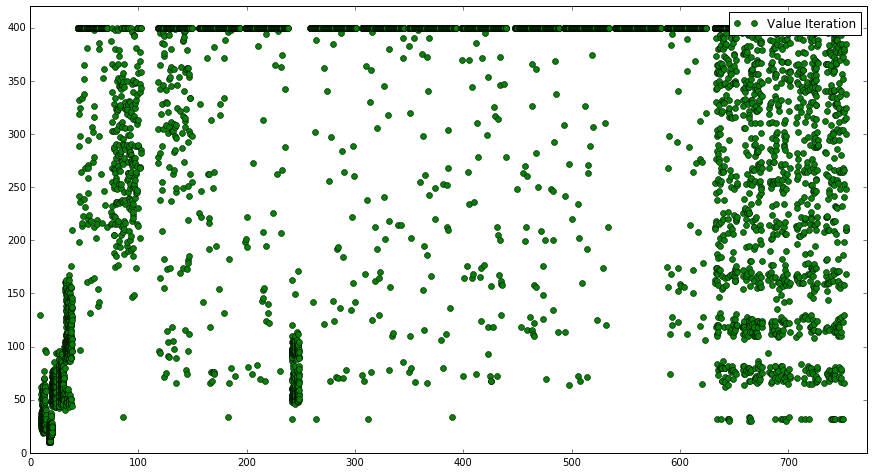

In [56]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/ValueIteration/openaigym.episode_batch.0.12026.stats.json")
timeRewardPlot(jsonData, 'g', 'Value Iteration')
# iterToRewardPlot(jsonData, 'g', 'Value Iteration')
avValueIt = average_reward_for_iterations(50)

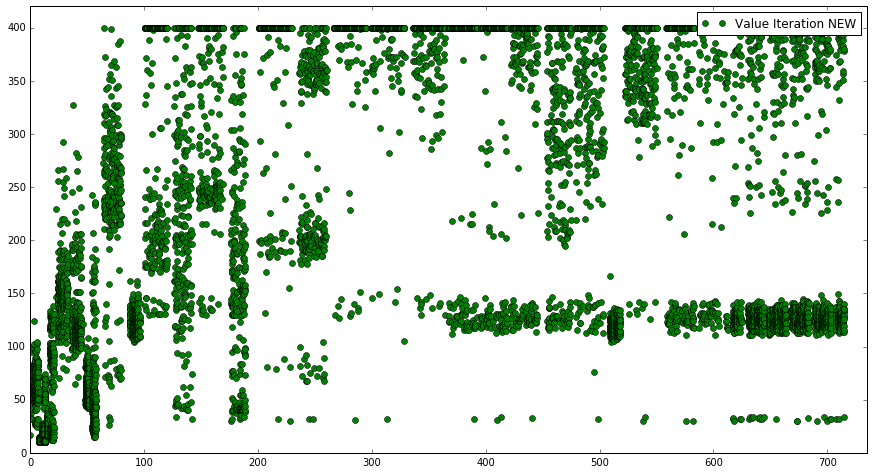

In [65]:
jsonData = loadJson("/home/joistick11/git/reinforcement-learning/openai-gym/cartpole/cart-pole-results/openaigym.episode_batch.0.2011.stats.json")
timeRewardPlot(jsonData, 'g', 'Value Iteration NEW')
# iterToRewardPlot(jsonData, 'g', 'Value Iteration')
avValueIt = average_reward_for_iterations(50)

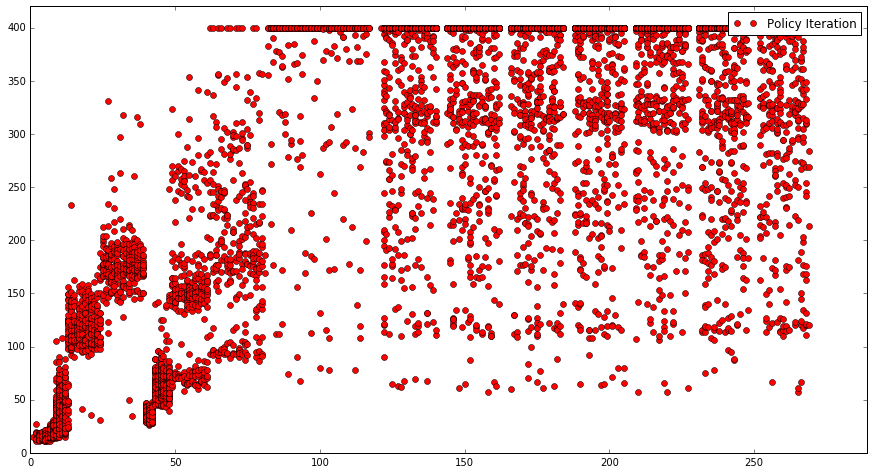

In [57]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/PolicyIteration/openaigym.episode_batch.0.28296.stats.json")
timeRewardPlot(jsonData, 'r', 'Policy Iteration')
iterToRewardPlot(jsonData, 'r', 'Policy Iteration')
avPolicy = average_reward_for_iterations(50)

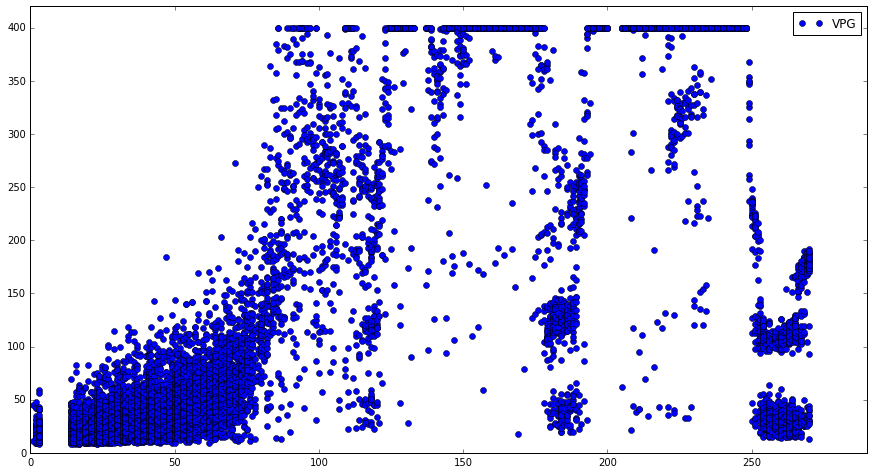

In [58]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/VPG/gym_log/openaigym.episode_batch.0.26984.stats.json")
timeRewardPlot(jsonData, 'b', 'VPG')
iterToRewardPlot(jsonData, 'b', 'VPG')
avVpg = average_reward_for_iterations(50)

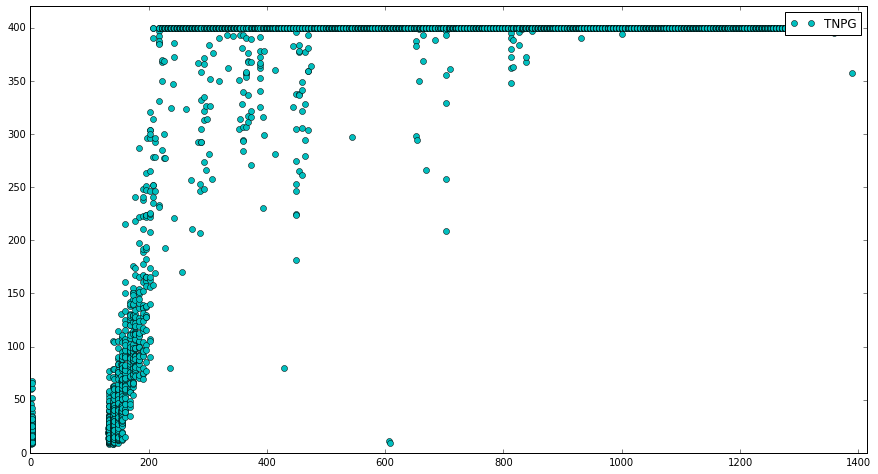

In [59]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/TNPG/gym_log/openaigym.episode_batch.0.29428.stats.json")
timeRewardPlot(jsonData, 'c', 'TNPG')
iterToRewardPlot(jsonData, 'c', 'TNPG')
avTnpg = average_reward_for_iterations(50)

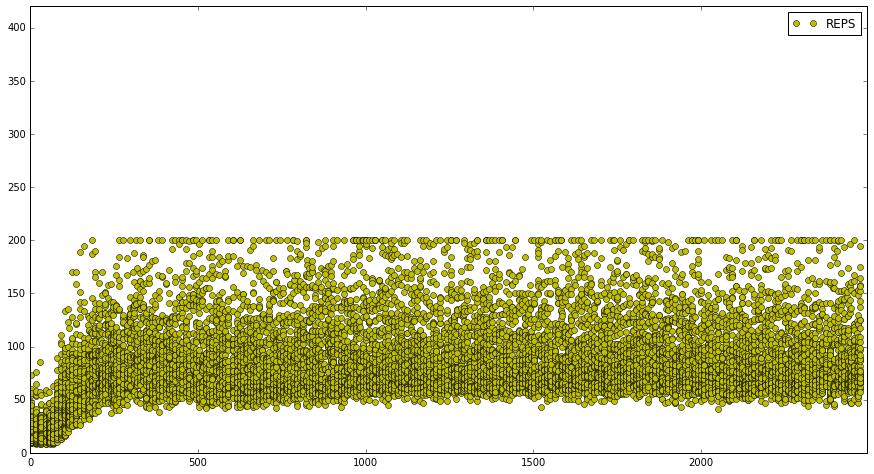

In [60]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/REPS/gym_log/openaigym.episode_batch.0.9932.stats.json")
timeRewardPlot(jsonData, 'y', 'REPS')
iterToRewardPlot(jsonData, 'y', 'REPS')
avReps = average_reward_for_iterations(50)

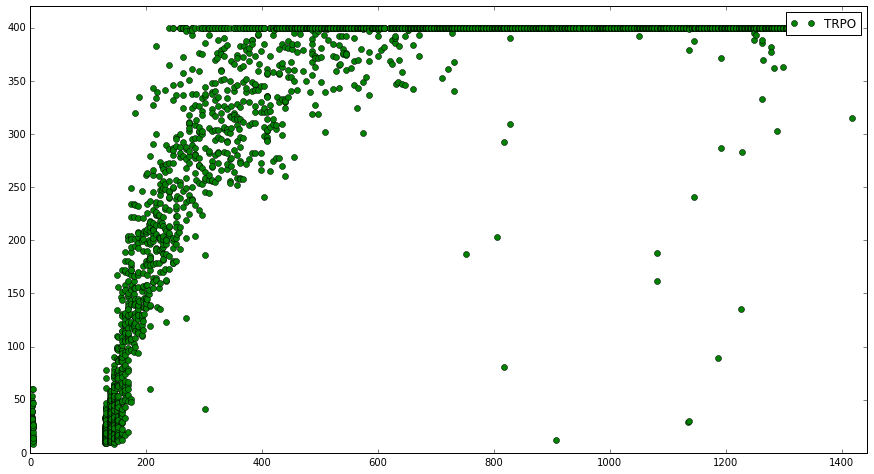

In [61]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/TRPO/gym_log/openaigym.episode_batch.0.30451.stats.json")
timeRewardPlot(jsonData, 'g', 'TRPO')
iterToRewardPlot(jsonData, 'g', 'TRPO')
avTRPO = average_reward_for_iterations(50)

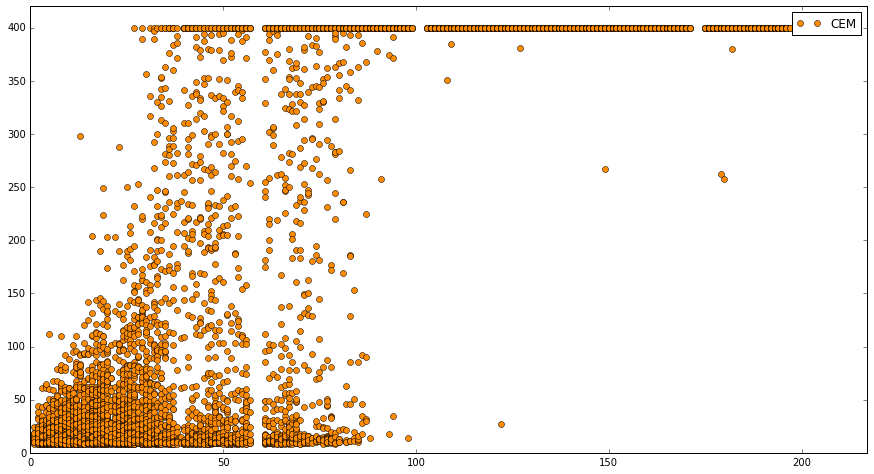

In [62]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/CEM/gym_log/openaigym.episode_batch.0.32225.stats.json")
timeRewardPlot(jsonData, 'darkorange', 'CEM')
iterToRewardPlot(jsonData, 'darkorange', 'CEM')
avCem = average_reward_for_iterations(50)

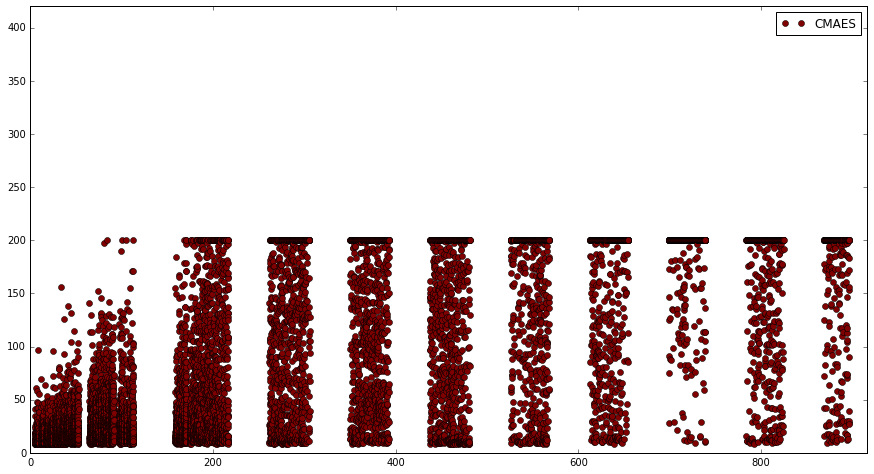

In [63]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/CMAES/gym_log/openaigym.episode_batch.0.3092.stats.json")
timeRewardPlot(jsonData, 'maroon', 'CMAES')
iterToRewardPlot(jsonData, 'maroon', 'CMAES')
avCmaes = average_reward_for_iterations(50)

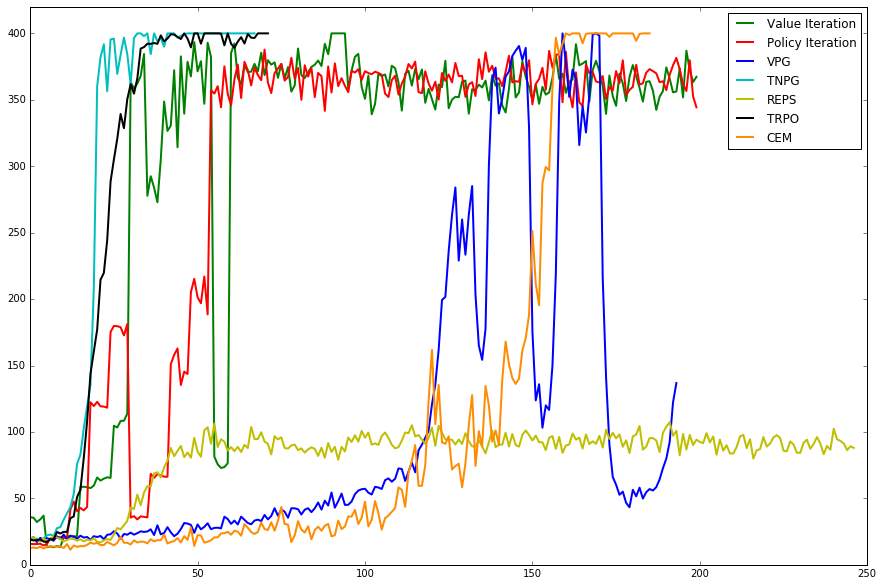

In [64]:
plt.figure(figsize = (15, 10))
plt.plot([i for i in range(0, len(avValueIt))], avValueIt, 
         color='g', label='Value Iteration', linewidth=2)
plt.plot([i for i in range(0, len(avPolicy))], avPolicy, 
         color='r', label='Policy Iteration', linewidth=2)
plt.plot([i for i in range(0, len(avVpg))], avVpg, 
         color='b', label='VPG', linewidth=2)
plt.plot([i for i in range(0, len(avTnpg))], avTnpg, 
         color='c', label='TNPG', linewidth=2)
plt.plot([i for i in range(0, len(avReps))], avReps, 
         color='y', label='REPS', linewidth=2)
plt.plot([i for i in range(0, len(avTRPO))], avTRPO, 
         color='k', label='TRPO', linewidth=2)
plt.plot([i for i in range(0, len(avCem))], avCem, 
         color='darkorange', label='CEM', linewidth=2)
# plt.xlim(0, 300 + 20)
plt.ylim(0, 400 + 20)
plt.legend()
plt.show()